In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv(r'C:\Users\rajku\Downloads\new_unicorn_Companies.csv')

Data overview

In [25]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    1074 non-null   int64  
 1   company       1074 non-null   object 
 2   valuation     1074 non-null   float64
 3   year_joined   1074 non-null   int64  
 4   industry      1074 non-null   object 
 5   city          1058 non-null   object 
 6   country       1074 non-null   object 
 7   continent     1074 non-null   object 
 8   year_founded  1074 non-null   int64  
 9   funding       1062 non-null   float64
 10  investors     1073 non-null   object 
 11  ROI           1062 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 100.8+ KB


,company_id,valuation,year_joined,year_founded,funding,ROI
count,1074.000000,1.074000e+03,1074.000000,1074.000000,1.062000e+03,1062.0000
mean,537.500000,3.455307e+09,2019.896648,2012.895717,5.572693e+08,inf
std,310.181399,8.547022e+09,2.001288,5.698573,8.101336e+08,NaN
min,1.000000,1.000000e+09,2007.000000,1919.000000,0.000000e+00,0.5000
25%,269.250000,1.000000e+09,2019.000000,2011.000000,2.230000e+08,3.4725
50%,537.500000,2.000000e+09,2021.000000,2014.000000,3.700000e+08,5.2250
75%,805.750000,3.000000e+09,2021.000000,2016.000000,6.092500e+08,8.2225
max,1074.000000,1.800000e+11,2022.000000,2021.000000,1.400000e+10,inf


In [5]:
df.isnull().sum()
df[df.isnull().any(axis=1)]

,company_id,company,valuation,year_joined,industry,city,country,continent,year_founded,funding,investors
12,13,FTX,3.200000e+10,2021,Fintech,NaN,Bahamas,North America,2018,2.000000e+09,"Sequoia Capital, Thoma Bravo, Softbank"
170,171,HyalRoute,4.000000e+09,2020,Mobile & telecommunications,NaN,Singapore,Asia,2015,2.630000e+08,Kuang-Chi
215,216,SSENSE,4.000000e+09,2021,E-commerce & direct-to-consumer,Montreal,Canada,North America,2003,NaN,Sequoia Capital
242,243,Moglix,3.000000e+09,2021,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,4.710000e+08,"Jungle Ventures, Accel, Venture Highway"
251,252,Trax,3.000000e+09,2019,Artificial intelligence,NaN,Singapore,Asia,2010,1.000000e+09,"Hopu Investment Management, Boyu Capital, DC T..."
325,326,Amber Group,3.000000e+09,2021,Fintech,NaN,Hong Kong,Asia,2015,3.280000e+08,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,383,Ninja Van,2.000000e+09,2021,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,9.750000e+08,"B Capital Group, Monk's Hill Ventures, Dynamic..."
424,425,Uplight,2.000000e+09,2021,Other,Boulder,United States,North America,2019,NaN,"Rubicon Technology Partners, Max Ventures, Inc..."
541,542,Advance Intelligence Group,2.000000e+09,2021,Artificial intelligence,NaN,Singapore,Asia,2016,5.360000e+08,"Vision Plus Capital, GSR Ventures, ZhenFund"
567,568,ISN,2.000000e+09,2020,"Supply chain, logistics, & delivery",Dallas,United States,North America,2001,NaN,Blackstone


considering the null count is negligible as compared to total rows there is no need to remove or replace to alter the results.

In [6]:
df[df.duplicated()]

,company_id,company,valuation,year_joined,industry,city,country,continent,year_founded,funding,investors


no duplicates indicating dataset has unique rows.

In [7]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(12,6))
sns.histplot(df["Valuation"],bins=10,kde=True)
plt.title("Distribution of Unicorn Valuations")
formatter = FuncFormatter(lambda x, _: f'{x/1e9:.0f}B')
plt.gca().xaxis.set_major_formatter(formatter)

KeyError: 'Valuation'

<Figure size 1200x600 with 0 Axes>

The distribution is heavilty right-skewed meaning Unicorns are not evenly distributed by value. A small number of companies capture a disproportionately large share of total valuation.“Most unicorns are just unicorns by definition; very few are genuinely massive.”

In [ ]:
df["Industry"] = (df["Industry"].str.strip().str.title())
plt.figure(figsize=(12, 8))
sns.boxplot(
    y="Industry",
    x="Valuation",
    data=df
)
formatter = FuncFormatter(lambda x, _: f'{x/1e9:.0f}B')
plt.gca().xaxis.set_major_formatter(formatter)
plt.title("Unicorn Valuation Distribution by Industry")
plt.tight_layout()
plt.show()

“The boxplot shows that while median unicorn valuations are relatively consistent across industries, valuation dispersion varies widely. Technology-driven sectors such as AI and internet software exhibit extreme right-tail outliers, indicating winner-takes-most dynamics. Therefore, median valuation is the most representative central measure, while outliers reflect industry standing out as dominant unicorns rather than noise.”
For Investors-
Risk-seeking funds prefer AI and software sectors.
Capital-preserving funds may favor health or infrastructure sectors.

In [11]:
ine=pd.read_csv(r"C:\Users\rajku\Downloads\vw_investor_exposure.csv")
ine.head()

,investor_name,active_cnt
0,.406 Ventures,1
1,01 Advisors,2
2,10T Fund,1
3,14W,3
4,1955 Capital,1


In [10]:
inv=pd.read_csv(r"C:\Users\rajku\Downloads\vw_investment_interest.csv")
inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   industry        16 non-null     object
 1   investment_cnt  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 388.0+ bytes


In [12]:
ins=pd.read_csv(r"C:\Users\rajku\Downloads\vw_industry_summary.csv")
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   industry       16 non-null     object 
 1   unicorn_count  16 non-null     int64  
 2   avg_valuation  16 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 516.0+ bytes


In [14]:
merged=inv.merge(ins,on="industry")

<Axes: xlabel='unicorn_count', ylabel='investment_cnt'>

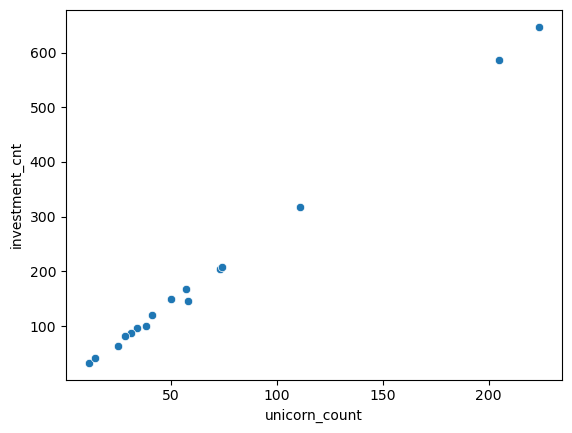

In [15]:
sns.scatterplot(x="unicorn_count",y="investment_cnt",data=merged)

Industries with more unicorns consistently attract more investments. suggesting that investors allocate funding based on demonstrated success rather than potential.The absence of industries with high investment but low unicorn counts indicates that unicorn density acts as a leading signal for capital inflows.


Which unicorn companies have had the biggest Return on Investment (ROI)?

In [41]:
df["ROI"]=round(df["valuation"]/df["funding"],2)
# xyz=df.groupby("continent").agg({
#     'ROI': 'mean', 
#     'company': 'count'
# }).rename(columns={'ROI': 'average_roi', 'company': 'company_count'}).sort_values("company_count",ascending=False)
# xyz
df3=df[df["continent"]=="North America"]
df_result = df3.groupby("city").agg({
    'ROI': 'mean', 
    'company': 'count'
}).rename(columns={'ROI': 'average_roi', 'company': 'company_count'}).sort_values("company_count",ascending=False)
df_result.head(5)

,average_roi,company_count
city,,
San Francisco,9.703224,152
New York,7.720686,103
Palo Alto,7.233333,18
Boston,13.757500,16
Mountain View,6.038125,16


In [ ]:
ROI_companies=df[df["Funding"].notnull()].sort_values("ROI",ascending=False).tail(8)
sns.barplot(x="Company",y="ROI",data=ROI_companies)
plt.xticks(rotation=45)
plt.show()

Companies like:SumUp,Momenta,Leap Motor Show very high ROI despite moderate funding.Capital efficiency matters more than absolute valuation when measuring performance quality.
“This chart highlights that the highest-ROI unicorns are not necessarily the most highly valued or most heavily funded companies. Instead, they represent firms that achieved significant valuations with relatively limited capital, indicating superior capital efficiency. This reinforces the power-law nature of venture outcomes, where a small number of disciplined companies generate outsized returns relative to the capital invested.”

How long does it usually take for a company to become a unicorn? Has it changed over time?

In [ ]:
df["years_to_unicorn"]=df["year_Joined"]-df["Year_Founded"]
sns.scatterplot(x="Year_Founded",y="years_to_unicorn",data=df,alpha=0.4)
sns.regplot(x="Year_Founded",y="years_to_unicorn",data=df,scatter=False,color="red")


Earlier companies took decades to become unicorns, while modern startups often reach unicorn status within just a few years, showing that startup growth has dramatically accelerated over time.
The blue bubbles represent individual unicorn companies. They show that older companies were rare and took decades to reach unicorn status, while modern startups are much more common and typically reach unicorn status within just a few years.

Which investors have funded the most unicorns?

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
ine1=ine.sort_values(["active_cnt"],ascending=False).head(10)
sns.barplot(y="investor_name",x="active_cnt",data=ine1,ax=ax[0])
ax[0].set_title("Top 10 Investors")


company_stats=df.groupby("Country")["Company"].agg(count="count")
company_stats=company_stats.sort_values("count",ascending=False).head(10)
sns.barplot(y="Country",x="count",data=company_stats,ax=ax[1])
ax[1].set_title("Top 10 Countries")
plt.tight_layout()
plt.show()
